# Import packages

In [1]:
from os.path import dirname, join as pjoin
import os
import numpy as np
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt

Her definere man navnene lydfilerne

In [2]:
audio_file_names = ["rev_b_12", "rev_b_14", "rev_n_12", "rev_n_14", "tele_b_12", "tele_b_14", "tele_n_12", "tele_n_14"]

Her laver man en path til de behandlet lydfiler

In [3]:
trimmed_path = "data/trimmed/"

Her laver vi lister til dataen af lydfilerne

In [4]:
audio_data_list = []
sample_rate_list = []
audio_len_list = []

Definer `process_audio` funktion

In [5]:
def process_audio(audio_file_path):
    sample_rate, audio_data = wavfile.read(audio_file_path)
    audio_duration = len(audio_data) / sample_rate
    return audio_data, sample_rate, audio_duration

Her køre vi `process_audio` på vores lyd filer

In [6]:
for audio_file in audio_file_names:
    audio_data, sample_rate, audio_duration = process_audio(pjoin(trimmed_path, f"{audio_file}_8192.wav"))
    audio_data_list.append(audio_data)
    sample_rate_list.append(sample_rate)
    audio_len_list.append(audio_duration)

Her laver vi en funktion `plot_fft` som plotter en FFT

In [23]:
def plot_fft(audio_data, sample_rate, file_name):
    # Køre fft på lyd
    n = len(audio_data)
    fft_result = np.fft.fft(audio_data)
    frequenzy = np.fft.fftfreq(n, 1 / sample_rate)
    # Laver plot med matplot lib
    plt.figure(figsize=(12, 6))
    plt.title(f"{"RSS20" if file_name[0] == "r" else "TE-20MN"} {"Bridge pickup" if file_name[len(file_name)-4] == "b" else "Neck Pickup"} {"normal spille position" if file_name[len(file_name)-1] == "4" else "midt på strengen"}")
    plt.xlabel("Frekvens [Hz]")
    plt.ylabel("Amplitude")
    plt.xlim(0, 1000)
    plt.xticks(np.arange(0, 1000, step=25), rotation=60)
    plt.plot(frequenzy[:n], np.abs(fft_result[:n]))
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5, axis='both')

    save_folder = "graphs"
    plt.savefig(pjoin(save_folder, f"{file_name}.png"))
    print(f"{file_name}.png saved")

    plt.show()

Her køre vi `plot_fft` gennem dataen

File: rev_b_12
rev_b_12.png saved


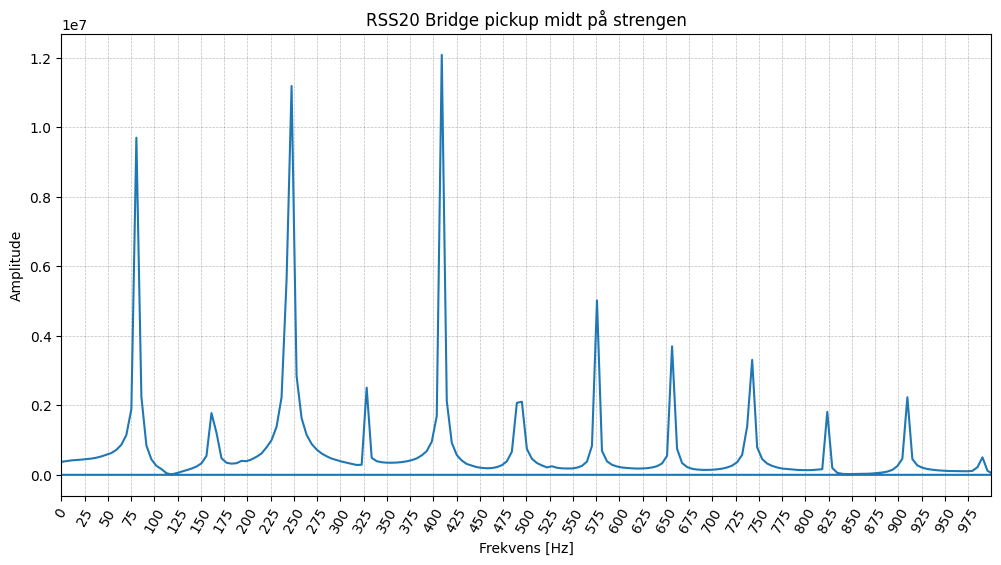

File: rev_b_14
rev_b_14.png saved


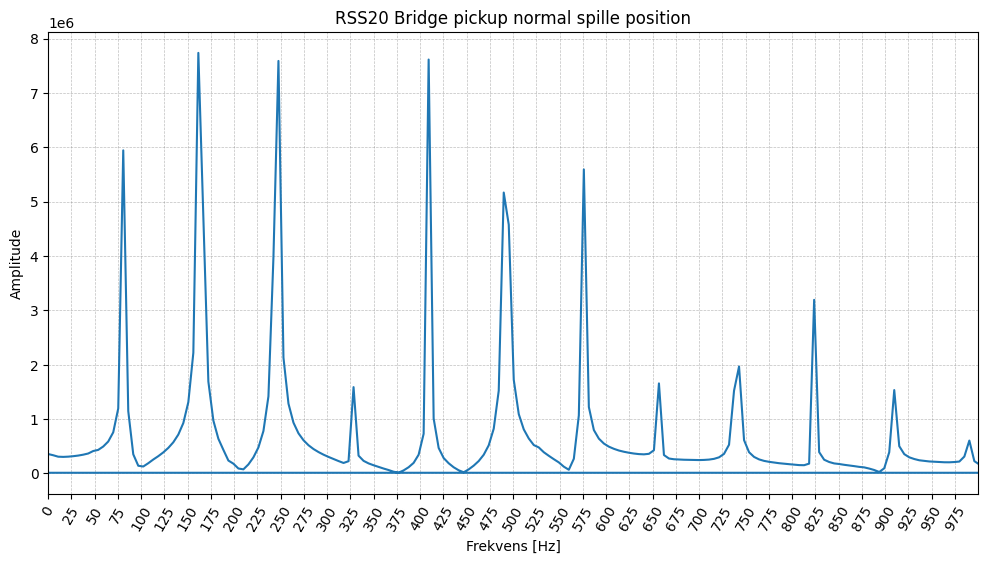

File: rev_n_12
rev_n_12.png saved


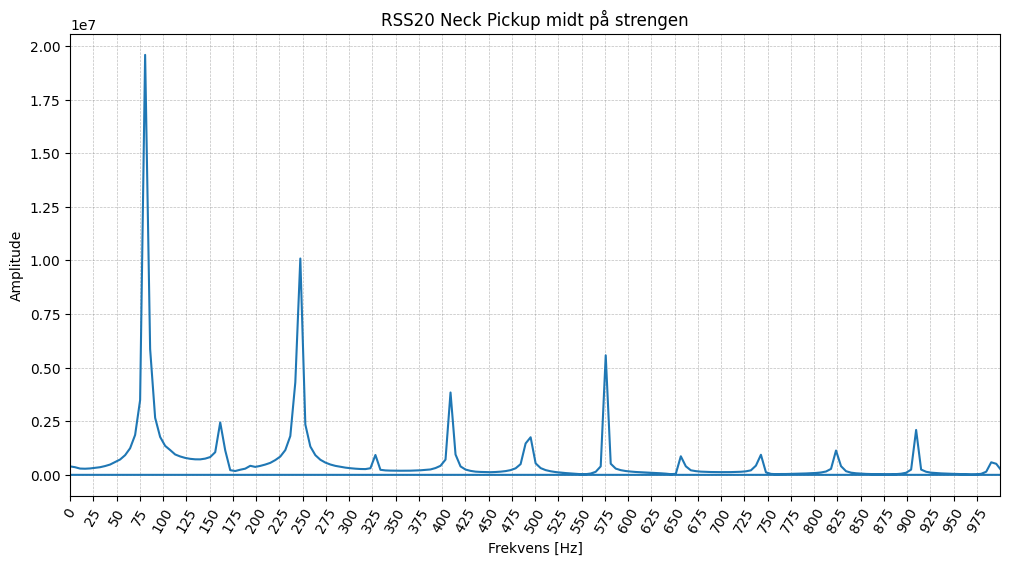

File: rev_n_14
rev_n_14.png saved


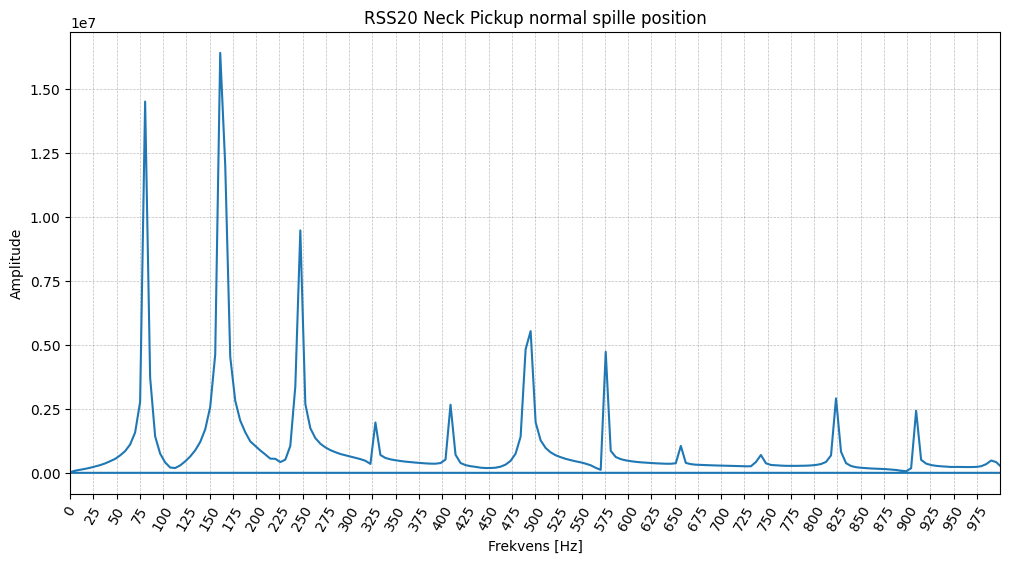

File: tele_b_12
tele_b_12.png saved


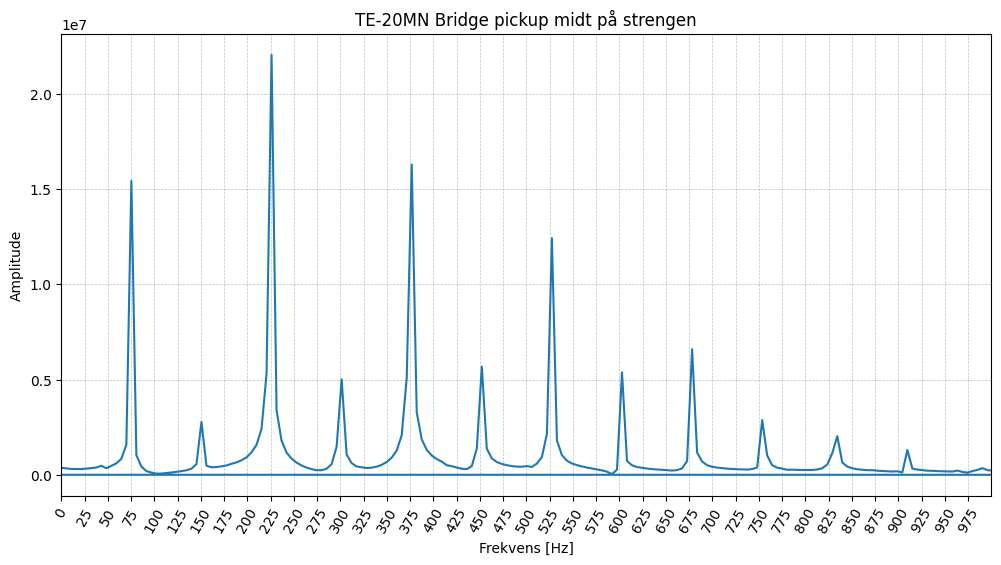

File: tele_b_14
tele_b_14.png saved


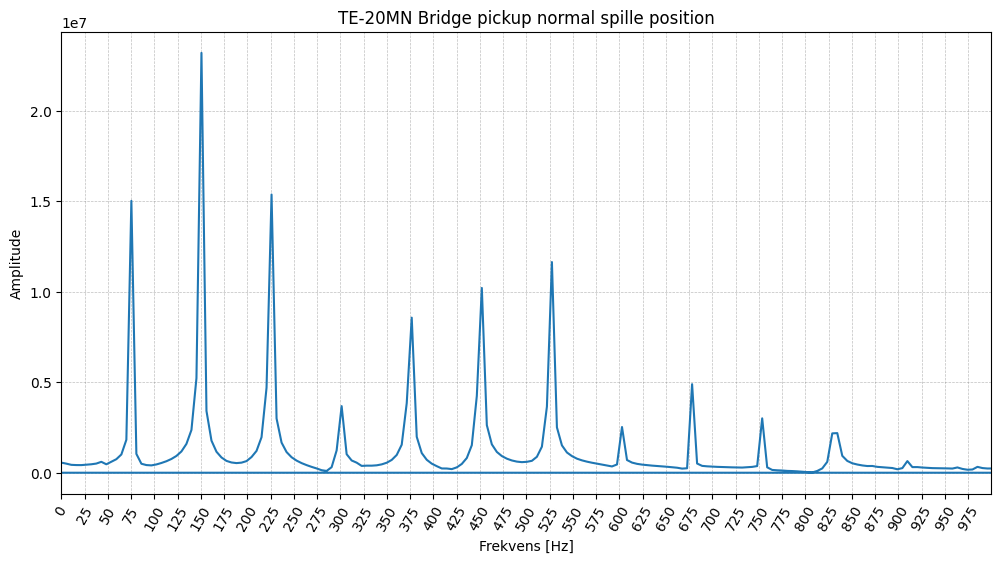

File: tele_n_12
tele_n_12.png saved


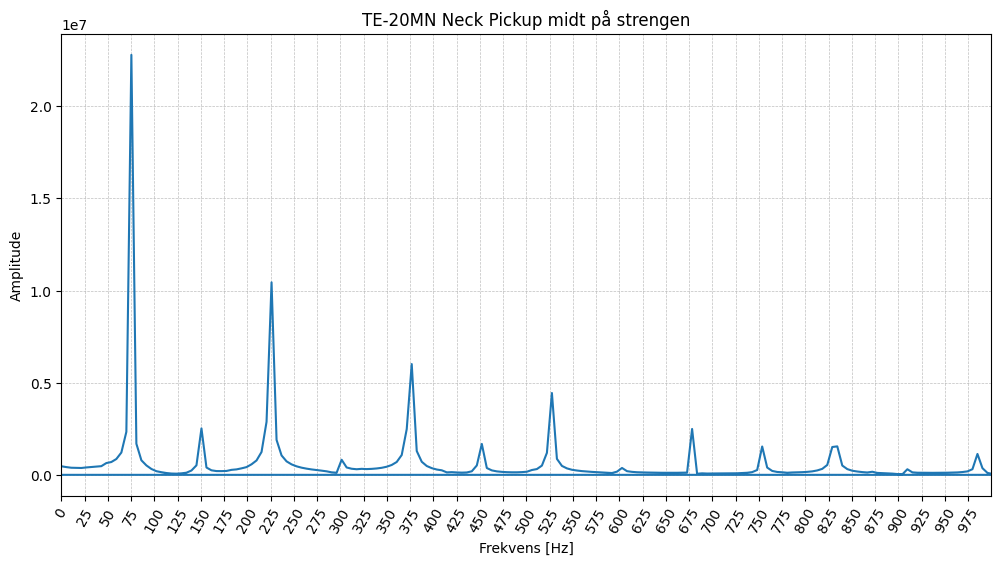

File: tele_n_14
tele_n_14.png saved


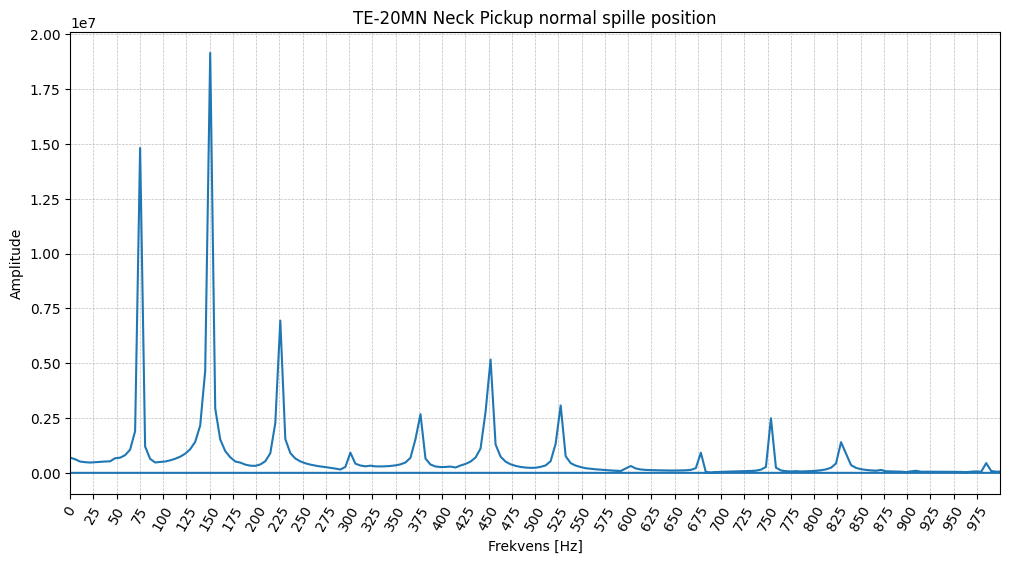

In [24]:
for i in range(len(audio_file_names)):
    print(f"File: {audio_file_names[i]}")
    plot_fft(audio_data_list[i], sample_rate_list[i], audio_file_names[i])